In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
file = pd.read_csv("trial123456.csv")
print(file)

                State/UT  Literacy rate  ...   BPL  Unemploy
0         Andhra Pradesh          67.02  ...   5.8       4.5
1      Arunachal Pradesh          65.38  ...  20.3       4.9
2                  Assam          72.19  ...  20.5       5.7
3                  Bihar          61.80  ...  31.2       6.6
4           Chhattisgarh          70.28  ...  24.8       5.6
5                  Delhi          86.21  ...   9.8       3.6
6                    Goa          88.70  ...   4.1       4.6
7                Gujarat          78.03  ...  10.1       0.9
8                Haryana          75.55  ...  10.3       4.2
9       Himachal Pradesh          82.80  ...   4.3       4.2
10       Jammu & Kashmir          67.16  ...   7.2       7.8
11             Jharkhand          66.41  ...  24.8       5.5
12             Karnataka          75.36  ...  15.3       3.4
13                Kerala          94.00  ...   5.0       7.8
14        Madhya Pradesh          69.32  ...  21.0       2.8
15           Maharashtra

In [0]:
for col in file.columns:
    print(col)

State/UT
Literacy rate
poverty rate
Unemployment Rate (in %) - NSSO - 2011-12
crime rate
%contribution
BPL
Unemploy


In [0]:
keep_dat=['State/UT','Unemployment Rate (in %) - NSSO - 2011-12','poverty rate','%contribution','Literacy rate']

In [0]:
dat=file[keep_dat]

In [0]:
dat

,State/UT,Unemployment Rate (in %) - NSSO - 2011-12,poverty rate,%contribution,Literacy rate
0,Andhra Pradesh,2.0,9.20,8.2,67.02
1,Arunachal Pradesh,2.2,34.67,0.1,65.38
2,Assam,4.6,31.98,2.9,72.19
3,Bihar,3.4,33.70,5.8,61.80
4,Chhattisgarh,1.4,35.93,2.5,70.28
5,Delhi,3.8,9.91,2.3,86.21
6,Goa,4.9,5.09,0.1,88.70
7,Gujarat,0.5,17.63,5.3,78.03
8,Haryana,2.9,11.16,2.6,75.55
9,Himachal Pradesh,1.3,8.00,0.6,82.80


In [0]:
dan=dat.dropna()

In [0]:
df=['Unemployment Rate (in %) - NSSO - 2011-12','poverty rate','%contribution','Literacy rate']

done=dan[df]

print(done)


    Unemployment Rate (in %) - NSSO - 2011-12  ...  Literacy rate
0                                         2.0  ...          67.02
1                                         2.2  ...          65.38
2                                         4.6  ...          72.19
3                                         3.4  ...          61.80
4                                         1.4  ...          70.28
5                                         3.8  ...          86.21
6                                         4.9  ...          88.70
7                                         0.5  ...          78.03
8                                         2.9  ...          75.55
9                                         1.3  ...          82.80
10                                        3.4  ...          67.16
11                                        2.6  ...          66.41
12                                        1.6  ...          75.36
13                                        6.6  ...          94.00
14        

In [0]:
done.describe()       #show the descriptive analysis

,Unemployment Rate (in %) - NSSO - 2011-12,poverty rate,%contribution,Literacy rate
count,35.000000,35.000000,35.000000,35.000000
mean,3.640000,17.790000,2.845714,77.940286
std,3.881191,11.199136,3.286187,8.598837
min,0.000000,1.000000,0.000000,61.800000
25%,1.350000,9.775000,0.100000,71.235000
50%,2.400000,14.050000,1.500000,78.030000
75%,3.750000,30.540000,5.850000,85.950000
max,17.700000,39.310000,9.300000,94.000000


In [0]:
import cufflinks as cf                             #Interactive plot depicting max,median and min of all numeric dataframe columns.
fig=done.iplot(asFigure=True,kind='box')
fig.show()

In [0]:
import plotly.express as px                            #for interactive scatter plot to depecit the linear relationship 
fig1 = px.scatter(dan,x="Unemployment Rate (in %) - NSSO - 2011-12",y="%contribution",color='State/UT')

fig1.show()
fig2 = px.scatter(dan,x="poverty rate",y="%contribution",color='State/UT')
fig2.show()
fig3 = px.scatter(dan,x="Literacy rate",y="%contribution",color='State/UT')
fig3.show()

In [0]:
done.corr()                                                                 #Correlation matrix

,Unemployment Rate (in %) - NSSO - 2011-12,poverty rate,%contribution,Literacy rate
Unemployment Rate (in %) - NSSO - 2011-12,1.000000,-0.219876,-0.293774,0.390664
poverty rate,-0.219876,1.000000,-0.019121,-0.528483
%contribution,-0.293774,-0.019121,1.000000,-0.357863
Literacy rate,0.390664,-0.528483,-0.357863,1.000000


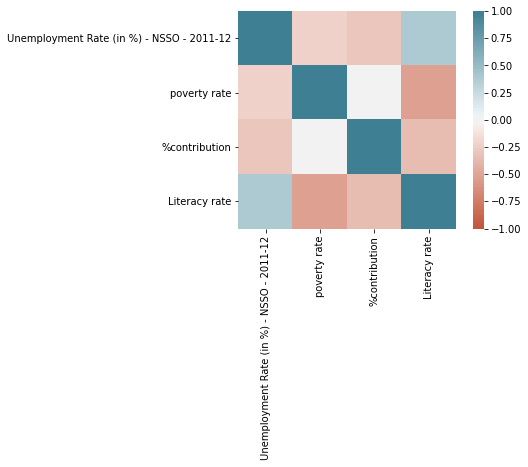

In [0]:
coMatrix=done.corr()
coMatrix.style.background_gradient(cmap='coolwarm')

ax = sns.heatmap(
    coMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [0]:
Y=done['%contribution']
X=done[['Unemployment Rate (in %) - NSSO - 2011-12','poverty rate','Literacy rate']]

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state= 0)


In [0]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
from scipy.stats import linregress
print(linregress(done['%contribution'], done['Literacy rate']))
print(linregress(done['%contribution'], done['Unemployment Rate (in %) - NSSO - 2011-12']))
print(linregress(done['%contribution'], done['poverty rate']))

LinregressResult(slope=-0.9364065695316406, intercept=80.60503126643859, rvalue=-0.3578631644451704, pvalue=0.03479594447032603, stderr=0.4253361340422846)
LinregressResult(slope=-0.3469648676662381, intercept=4.62736288055878, rvalue=-0.29377356512736125, pvalue=0.08673172711068965, stderr=0.19652460850961792)
LinregressResult(slope=-0.0651638336482284, intercept=17.975437652324672, rvalue=-0.01912116704312578, pvalue=0.9131835638177148, stderr=0.593138143051468)


In [0]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

                                           Coefficient
Unemployment Rate (in %) - NSSO - 2011-12    -0.082736
poverty rate                                 -0.112838
Literacy rate                                -0.215036


In [0]:
y_pred = model.predict(X_test)
print(y_pred)

[2.55661214 2.28906034 0.89828894 3.58666095 5.86065219 2.01931636
 5.94481627]


In [0]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [0]:

model=sm.OLS(Y_train,X_train)

result=model.fit()
predictions=result.predict(X_test)
print(predictions,Y_test)
print(result.summary())


29    2.015983
20    2.800858
16    2.784190
28    2.442071
22    2.465224
15    3.096252
10    2.026732
dtype: float64 29    0.0
20    2.6
16    0.1
28    6.2
22    7.1
15    8.8
10    1.1
Name: %contribution, dtype: float64
                                 OLS Regression Results                                
Dep. Variable:          %contribution   R-squared (uncentered):                   0.399
Model:                            OLS   Adj. R-squared (uncentered):              0.327
Method:                 Least Squares   F-statistic:                              5.542
Date:                Tue, 19 May 2020   Prob (F-statistic):                     0.00467
Time:                        11:33:10   Log-Likelihood:                         -72.267
No. Observations:                  28   AIC:                                      150.5
Df Residuals:                      25   BIC:                                      154.5
Df Model:                           3                                 

In [0]:
file2 = pd.read_csv("FinalLit.csv")
print(file2)

                State/UT  literacy rate  ...     %urban     %rural
0         Andhra Pradesh          67.02  ...  33.363462  66.636538
1      Arunachal Pradesh          65.38  ...  22.652301  77.267048
2                  Assam          72.19  ...  14.064012  85.819682
3                  Bihar          61.80  ...  11.267695  88.449100
4           Chhattisgarh          70.28  ...  23.239350  76.741069
5                  Delhi          86.21  ...  76.875300   5.627414
6                    Goa          88.70  ...  62.137884  37.805758
7                Gujarat          78.03  ...  42.542922  57.364318
8                Haryana          75.55  ...  34.797157  65.209229
9       Himachal Pradesh          82.80  ...  10.032687  89.849419
10       Jammu & Kashmir          67.16  ...  31.143759  68.801605
11             Jharkhand          66.41  ...  27.222899  72.837892
12             Karnataka          75.36  ...  24.036801  75.896824
13                Kerala          94.00  ...  38.592455  61.46

In [0]:

file3=pd.merge(file, file2, on='State/UT')


In [0]:
file3

,State/UT,Literacy rate,poverty rate,Unemployment Rate (in %) - NSSO - 2011-12,crime rate,%contribution,BPL,Unemploy,literacy rate,%male,%female,%urban,%rural
0,Andhra Pradesh,67.02,9.20,2.0,15.8,8.2,5.8,4.5,67.02,50.179423,49.820577,33.363462,66.636538
1,Arunachal Pradesh,65.38,34.67,2.2,28.3,0.1,20.3,4.9,65.38,51.593414,48.406586,22.652301,77.267048
2,Assam,72.19,31.98,4.6,6.6,2.9,20.5,5.7,72.19,51.078830,48.921170,14.064012,85.819682
3,Bihar,61.80,33.70,3.4,25.1,5.8,31.2,6.6,61.80,52.140675,47.859325,11.267695,88.449100
4,Chhattisgarh,70.28,35.93,1.4,20.7,2.5,24.8,5.6,70.28,50.236037,49.763963,23.239350,76.741069
5,Delhi,86.21,9.91,3.8,37.0,2.3,9.8,3.6,86.21,52.938749,46.465585,76.875300,5.627414
6,Goa,88.70,5.09,4.9,17.8,0.1,4.1,4.6,88.70,50.676530,49.323470,62.137884,37.805758
7,Gujarat,78.03,17.63,0.5,12.0,5.3,10.1,0.9,78.03,52.103608,47.896392,42.542922,57.364318
8,Haryana,75.55,11.16,2.9,25.8,2.6,10.3,4.2,75.55,53.230595,46.769405,34.797157,65.209229
9,Himachal Pradesh,82.80,8.00,1.3,17.8,0.6,4.3,4.2,82.80,50.722139,49.277861,10.032687,89.849419


In [0]:
file3.dropna()

,State/UT,Literacy rate,poverty rate,Unemployment Rate (in %) - NSSO - 2011-12,crime rate,%contribution,BPL,Unemploy,literacy rate,%male,%female,%urban,%rural
0,Andhra Pradesh,67.02,9.20,2.0,15.8,8.2,5.8,4.5,67.02,50.179423,49.820577,33.363462,66.636538
1,Arunachal Pradesh,65.38,34.67,2.2,28.3,0.1,20.3,4.9,65.38,51.593414,48.406586,22.652301,77.267048
2,Assam,72.19,31.98,4.6,6.6,2.9,20.5,5.7,72.19,51.078830,48.921170,14.064012,85.819682
3,Bihar,61.80,33.70,3.4,25.1,5.8,31.2,6.6,61.80,52.140675,47.859325,11.267695,88.449100
4,Chhattisgarh,70.28,35.93,1.4,20.7,2.5,24.8,5.6,70.28,50.236037,49.763963,23.239350,76.741069
5,Delhi,86.21,9.91,3.8,37.0,2.3,9.8,3.6,86.21,52.938749,46.465585,76.875300,5.627414
6,Goa,88.70,5.09,4.9,17.8,0.1,4.1,4.6,88.70,50.676530,49.323470,62.137884,37.805758
7,Gujarat,78.03,17.63,0.5,12.0,5.3,10.1,0.9,78.03,52.103608,47.896392,42.542922,57.364318
8,Haryana,75.55,11.16,2.9,25.8,2.6,10.3,4.2,75.55,53.230595,46.769405,34.797157,65.209229
9,Himachal Pradesh,82.80,8.00,1.3,17.8,0.6,4.3,4.2,82.80,50.722139,49.277861,10.032687,89.849419


In [0]:
d={"State/UT","Literacy rate","%male","%female","%urban","%rural","%contribution"}

In [0]:
file3=file3[d]

In [0]:
file3

,%urban,Literacy rate,%contribution,%female,%male,State/UT,%rural
0,33.363462,67.02,8.2,49.820577,50.179423,Andhra Pradesh,66.636538
1,22.652301,65.38,0.1,48.406586,51.593414,Arunachal Pradesh,77.267048
2,14.064012,72.19,2.9,48.921170,51.078830,Assam,85.819682
3,11.267695,61.80,5.8,47.859325,52.140675,Bihar,88.449100
4,23.239350,70.28,2.5,49.763963,50.236037,Chhattisgarh,76.741069
5,76.875300,86.21,2.3,46.465585,52.938749,Delhi,5.627414
6,62.137884,88.70,0.1,49.323470,50.676530,Goa,37.805758
7,42.542922,78.03,5.3,47.896392,52.103608,Gujarat,57.364318
8,34.797157,75.55,2.6,46.769405,53.230595,Haryana,65.209229
9,10.032687,82.80,0.6,49.277861,50.722139,Himachal Pradesh,89.849419


In [0]:
import plotly.graph_objects as go

# Add data
state= file3["State/UT"]


fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=state, y=file3["%male"], name='Male',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=state, y=file3["%female"], name = 'Female',
                         line=dict(color='royalblue', width=4)))

fig.add_trace(go.Scatter(x=state, y=file3["Literacy rate"], name='Literacy rate',
                         line = dict(color='green', width=4,)))

# Edit the layout
fig.update_layout(title='Literacy rate and gender',
                   xaxis_title='States',
                   yaxis_title='Rates')


fig.show()